<a href="https://colab.research.google.com/github/hotaf/Covid19/blob/master/Covid19_prediction_KSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import lib
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import math
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime

In [4]:
from google.colab import files
uploaded = files.upload()

Saving time_series_covid_19_confirmed.csv to time_series_covid_19_confirmed.csv


In [0]:
confirmed_df = pd.read_csv('time_series_covid_19_confirmed.csv')

In [8]:
confirmed_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,22.218295,23.730314,2.242915,2.643725,3.801619,5.797571,8.562753,11.834008,22.566802,24.947368,33.319838,40.145749,48.688259,67.902834,80.429150,96.663968,111.805668,124.578947,139.137652,150.186235,162.449393,173.016194,181.271255,182.967611,244.291498,270.676113,279.360324,288.238866,296.469636,304.068826,306.105263,308.068826,310.182186,316.352227,317.230769,318.736842,321.574899,324.400810,327.854251,331.072874,335.469636,342.643725,348.060729,354.874494,362.344130,371.651822,385.457490,400.024291,415.008097,429.603239,449.825911,478.218623,487.785425,555.570850,599.251012,644.906883,701.773279,764.299595,835.659919,947.105263,1066.327935,1196.748988,1327.902834,1495.036437,1655.902834,1856.340081,2106.680162
std,24.640923,71.211818,28.306929,28.406933,35.360701,49.208941,68.764438,92.646109,227.415960,228.786782,315.290779,373.801667,459.989674,714.923333,864.260444,1065.181810,1255.255218,1411.083794,1591.838028,1728.508619,1889.427071,2022.763812,2126.953270,2127.295626,3069.457471,3463.462170,3580.671838,3703.577765,3818.458874,3926.094151,3948.308236,3974.437645,3988.507137,4078.869123,4078.866486,4091.739053,4123.423706,4148.885428,4174.882775,4195.168257,4222.179803,4259.080563,4272.409664,4281.685761,4291.481738,4303.710579,4318.795706,4334.148160,4349.527436,4368.723146,4385.217523,4418.250372,4428.174151,4524.633824,4609.041506,4707.732355,4825.566093,4965.791491,5153.935135,5455.583170,5822.311560,6266.803300,6720.605191,7350.300972,7986.868683,8837.650859,9988.822708
min,-41.454500,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.242250,-15.245250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,3.500000,4.000000,5.000000,8.500000,8.500000,11.000000,13.000000
50%,24.00

In [0]:
cols = confirmed_df.keys()

In [0]:
#Start from 3/2/20 since coronvirus started in Saudi Arabia 
confirmed = confirmed_df.loc[:, cols[43]:cols[-1]]

In [10]:
confirmed

,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,5.0,7.0,7.0,7.0,11.0,16.0,21.0,22.0,22.0,22.0,24.0,24.0,40.0,40.0,74.0,84.0,94.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,12.0,23.0,33.0,38.0,42.0,51.0,55.0,59.0,64.0,70.0,76.0,89.0,104.0,123.0,146.0,174.0
2,1.0,3.0,5.0,12.0,12.0,17.0,17.0,19.0,20.0,20.0,20.0,24.0,26.0,37.0,48.0,54.0,60.0,74.0,87.0,90.0,139.0,201.0,230.0,264.0,302.0,367.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,39.0,39.0,53.0,75.0,88.0,113.0,133.0,164.0,188.0,224.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [0]:
dates = confirmed.keys()
world_cases = []
Ksa_cases = [] 

In [0]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    # World confirmed Cases
    world_cases.append(confirmed_sum)
    # Ksa case study 
    Ksa_cases.append(confirmed_df[confirmed_df['Country/Region']=='Saudi Arabia'][i].sum())
    
  

In [0]:
#array of dates and confirmed cases in KSA
since_3_1 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
Ksa_cases = np.array(Ksa_cases).reshape(-1, 1)

In [0]:
#future forcasting dates of ten days 
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [0]:
# convert every date to datetime  to process it 
start = '3/1/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

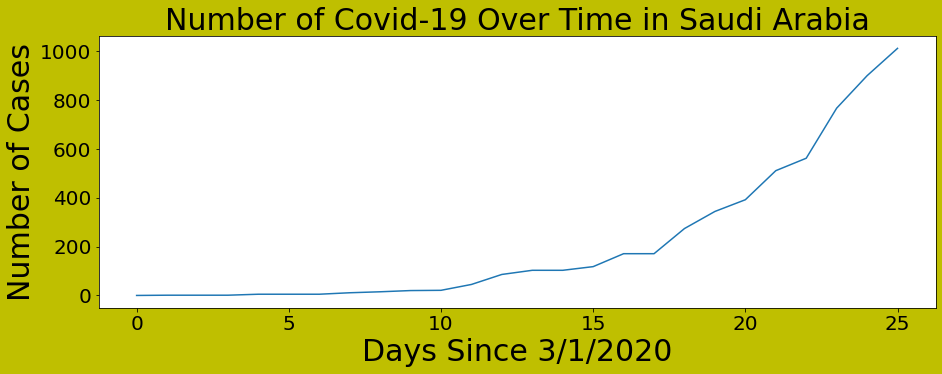

In [96]:
# plot number of cases over a time in KSA
plt.figure(figsize=(15, 5),facecolor='y')
plt.plot(adjusted_dates, Ksa_cases)
plt.title('Number of Covid-19 Over Time in Saudi Arabia', size=30)
plt.xlabel('Days Since 3/1/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [0]:
# split data into training and testing set
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(since_3_1, Ksa_cases, test_size=0.15, shuffle=False)

**SVR**

In [31]:
# I chose the folloing parameter based on gridsearch that I did it before
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean absolute error: 69.83589287045365
Mean squared error: 7813.844039538123


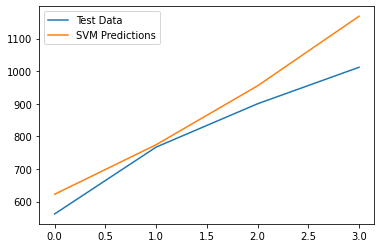

In [93]:
# predict on SVR model and plot actual and prediction 
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('Mean absolute error:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('Mean squared error:',mean_squared_error(svm_test_pred, y_test_confirmed))


In [34]:
 #Future predictions using SVM 
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], np.round(svm_pred[-10:])))

SVM future predictions:


{('03/27/2020', 1419.0),
 ('03/28/2020', 1711.0),
 ('03/29/2020', 2050.0),
 ('03/30/2020', 2441.0),
 ('03/31/2020', 2890.0),
 ('04/01/2020', 3403.0),
 ('04/02/2020', 3986.0),
 ('04/03/2020', 4647.0),
 ('04/04/2020', 5393.0),
 ('04/05/2020', 6232.0)}

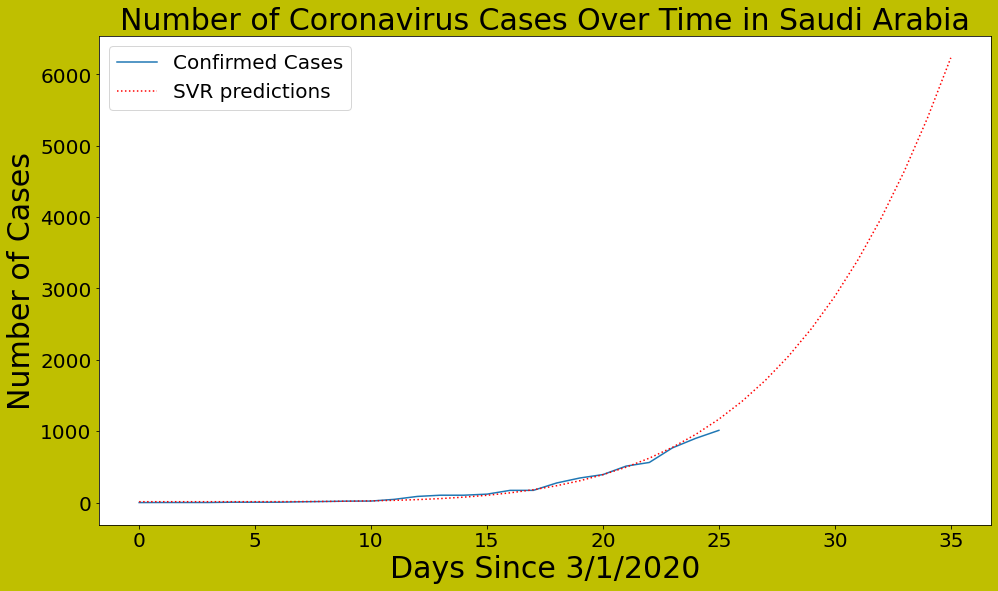

In [98]:
plt.figure(figsize=(16, 9), edgecolor=	'black', facecolor='y')
plt.plot(adjusted_dates, Ksa_cases)
plt.plot(future_forcast, svm_pred, linestyle='dotted', color='red')
plt.title('Number of Coronavirus Cases Over Time in Saudi Arabia', size=30)
plt.xlabel('Days Since 3/1/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVR predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

**Plynomial Regression**

In [0]:
# transform our data for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [100]:
# polynomial regression
import tensorflow as tf
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('Mean absolute error:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('Mean squared error:',mean_squared_error(test_linear_pred, y_test_confirmed))

Mean absolute error: 135.85288794707776
Mean squared error: 26418.14927856514


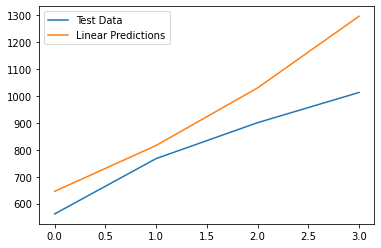

In [38]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Linear Predictions'])

In [0]:
print('Linear future predictions:')
set(zip(future_forcast_dates[-10:], np.round(linear_pred[-10:])))

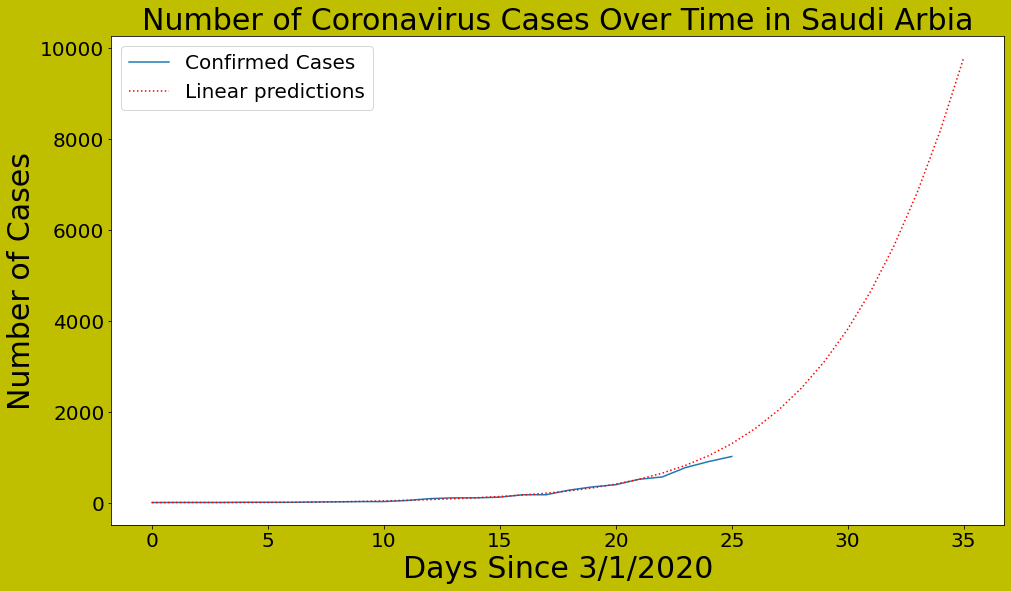

In [99]:
plt.figure(figsize=(16, 9), edgecolor=	'black', facecolor='y')
plt.plot(adjusted_dates, Ksa_cases)
plt.plot(future_forcast, linear_pred, linestyle='dotted', color='red')
plt.title('Number of Coronavirus Cases Over Time in Saudi Arbia', size=30)
plt.xlabel('Days Since 3/1/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

**bayesian ridge**

In [101]:
# Try Another Algorithm
# bayesian ridge  regression
bayesian = BayesianRidge(fit_intercept=False, normalize=True, tol= 0.0001,lambda_2= 0.0001, lambda_1= 1e-06,alpha_2=  1e-05,alpha_1=0.0001 )
bayesian.fit(poly_X_train_confirmed, y_train_confirmed)
test_bayesian_pred = bayesian.predict(poly_X_test_confirmed)
bayesian_pred = bayesian.predict(poly_future_forcast)
print('Mean absolute error:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('Mean squared error:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

Mean absolute error: 32.4826960694723
Mean squared error: 1398.8342333090031


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


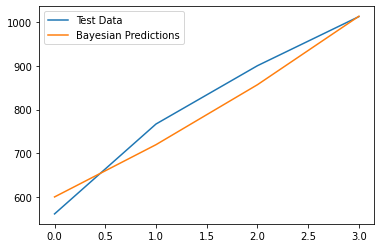

In [102]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Predictions'])

In [45]:
print('bayesian future predictions:')
set(zip(future_forcast_dates[-10:], np.round(bayesian_pred[-10:])))

bayesian future predictions:


{('03/27/2020', 1190.0),
 ('03/28/2020', 1391.0),
 ('03/29/2020', 1617.0),
 ('03/30/2020', 1870.0),
 ('03/31/2020', 2154.0),
 ('04/01/2020', 2470.0),
 ('04/02/2020', 2821.0),
 ('04/03/2020', 3210.0),
 ('04/04/2020', 3640.0),
 ('04/05/2020', 4113.0)}

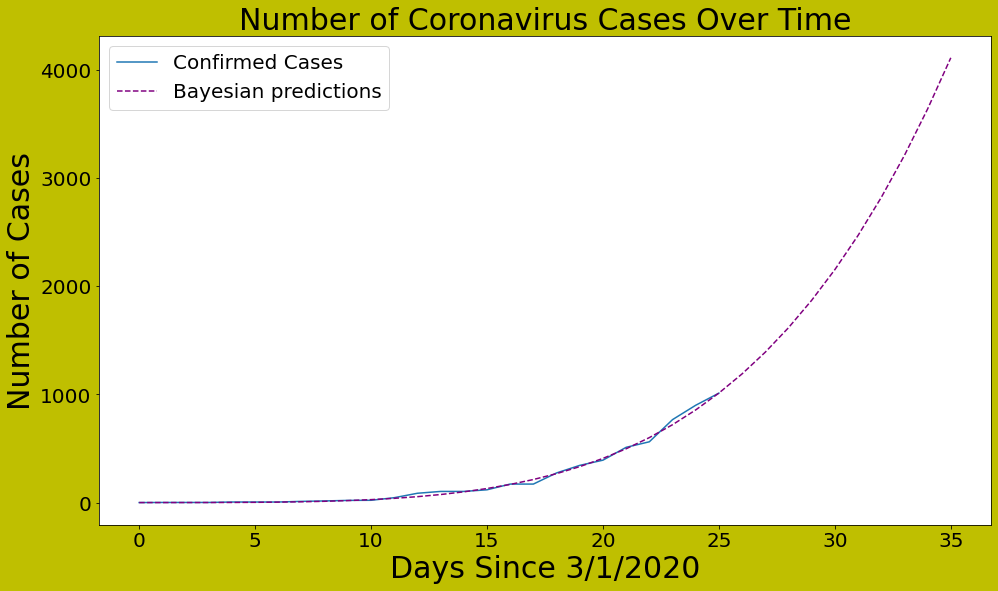

In [53]:
plt.figure(figsize=(16, 9), edgecolor=	'black', facecolor='y')
plt.plot(adjusted_dates, Ksa_cases)
plt.plot(future_forcast, bayesian_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 3/1/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Bayesian predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()